Nombre de los participantes Proyecto 
Juan José Naranjo Velásquez CC : 1039474689 
Alejandro Mora Suarez CC: 1128437044 
Kenneth David Leonel Triana CC: 1192817456 

[Problemática](https://www.elcolombiano.com/medellin/con-tos-y-gripa-viven-en-las-zonas-con-la-peor-calidad-del-aire-del-aburra-KB25241931)

La calidad del aire en Medellín juega un papel importante para adultos mayores, niños menores de 5 años, mujeres embarazadas y gente con afecciones cardiorrespiratorias, dado que una mala calidad del aire influye con afecciones respiratorias, cardiacas, de la piel y hasta con la aparición de cáncer.

Dentro de las métricas que acompaña la calidad del aire, el número de 2.5 micras es de gran relevancia dado que se toma como patrón para medir las partículas con un tamaño minúsculo y penetran más fácil en órganos como los pulmones.


**Objetivo proyecto**: Determinar la incidencia de las variables metereológicas sobre la métrica pm2.5 para la calidad del aire.

In [16]:
#Instalar librerias

#%pip install pandas numpy ydata-profiling ipywidgets numba

In [17]:
# importar librerias
import pandas as pd
import numpy as np
import numba
from numba import njit


Obtener los datos y dejarlos en dataframes

In [18]:
#Extraer datos de calidad del aire en las estaciones  # 69 Caldas, 86 Aranjuez, 28 Itagui
def get_data (url):
    """ 
    Función utilizada para la obtención de datos en tipo DataFrame según las bases de datos del repositorio

    In[0]: url del dataset en el repositorio
    Out[0]: DataFrame con los datos extraídos
    """
    return pd.read_csv(url)

# Datos de la calidad del aire tomados desde red SIATA de monitoreo de calidad del aire en Valle de Aburra
cal_aire_ita = 'https://raw.githubusercontent.com/kennethLeonel/Monografia-calidad-del-aire-valle-de-aburra/main/28_itagui/estacion_data_calidadaire_28_20240301_20240331.csv'
cal_aire_cal = 'https://raw.githubusercontent.com/kennethLeonel/Monografia-calidad-del-aire-valle-de-aburra/main/69_Caldas/estacion_data_calidadaire_69_20240301_20240331.csv'
cal_aire_ara = 'https://raw.githubusercontent.com/kennethLeonel/Monografia-calidad-del-aire-valle-de-aburra/main/86_Aranjuez/estacion_data_calidadaire_86_20240301_20240331.csv'


cal_aire_ita = get_data(cal_aire_ita)
cal_aire_cal = get_data(cal_aire_cal)
cal_aire_ara = get_data(cal_aire_ara)

# Datos de temperatura,presion,humedad,precipitacion y vientos estacion itagui 28
temp_ita='https://raw.githubusercontent.com/kennethLeonel/Monografia-calidad-del-aire-valle-de-aburra/main/28_itagui/Temperatura/estacion_data_temperatura_252__20240201_20240229.csv'
humedad_ita='https://raw.githubusercontent.com/kennethLeonel/Monografia-calidad-del-aire-valle-de-aburra/main/28_itagui/humedad/estacion_data_humedad_252__20240201_20240229.csv'
presion_ita='https://raw.githubusercontent.com/kennethLeonel/Monografia-calidad-del-aire-valle-de-aburra/main/28_itagui/presion/estacion_data_presion_252__20240201_20240229.csv'
precipitacion_ita='https://raw.githubusercontent.com/kennethLeonel/Monografia-calidad-del-aire-valle-de-aburra/main/69_Caldas/precipitacion/estacion_data_precipitacion_105__20240201_20240229.csv'
vientos_ita='https://raw.githubusercontent.com/kennethLeonel/Monografia-calidad-del-aire-valle-de-aburra/main/28_itagui/vientos/estacion_data_vientos_252__20240201_20240229.csv'

temp_ita=get_data(temp_ita)
humedad_ita=get_data(humedad_ita)
presion_ita=get_data(presion_ita)
precipitacion_ita=get_data(precipitacion_ita)
vientos_ita=get_data(vientos_ita)


# Datos de temperatura,presion,humedad,precipitacion y vientos estacion Caldas 69
temp_cal='https://raw.githubusercontent.com/kennethLeonel/Monografia-calidad-del-aire-valle-de-aburra/main/69_Caldas/Temperatura/estacion_data_temperatura_105__20240201_20240229.csv'
humedad_cal='https://raw.githubusercontent.com/kennethLeonel/Monografia-calidad-del-aire-valle-de-aburra/main/69_Caldas/humedad/estacion_data_humedad_105__20240201_20240229.csv'
precipitacion_cal='https://raw.githubusercontent.com/kennethLeonel/Monografia-calidad-del-aire-valle-de-aburra/main/69_Caldas/precipitacion/estacion_data_precipitacion_105__20240201_20240229.csv'
presion_cal='https://raw.githubusercontent.com/kennethLeonel/Monografia-calidad-del-aire-valle-de-aburra/main/69_Caldas/presion/estacion_data_presion_105__20240201_20240229.csv'
vientos_cal='https://raw.githubusercontent.com/kennethLeonel/Monografia-calidad-del-aire-valle-de-aburra/main/69_Caldas/vientos/estacion_data_vientos_105__20240201_20240229.csv'

temp_cal=get_data(temp_cal)
humedad_cal=get_data(humedad_cal)
precipitacion_cal=get_data(precipitacion_cal)
presion_cal=get_data(presion_cal)
vientos_cal=get_data(vientos_cal)


# Datos de temperatura,presion,humedad,precipitacion y vientos estacion aranjuez 86
temp_aranj='https://raw.githubusercontent.com/kennethLeonel/Monografia-calidad-del-aire-valle-de-aburra/main/86_Aranjuez/temperatura/estacion_data_temperatura_68__20240201_20240229.csv'
humedad_aranj='https://raw.githubusercontent.com/kennethLeonel/Monografia-calidad-del-aire-valle-de-aburra/main/86_Aranjuez/humedad/estacion_data_humedad_68__20240201_20240229.csv'
precipitacion_aranj='https://raw.githubusercontent.com/kennethLeonel/Monografia-calidad-del-aire-valle-de-aburra/main/86_Aranjuez/precipitacion/estacion_data_precipitacion_68__20240201_20240229.csv'
presion_aranj='https://raw.githubusercontent.com/kennethLeonel/Monografia-calidad-del-aire-valle-de-aburra/main/86_Aranjuez/presion/estacion_data_presion_68__20240201_20240229.csv'
vientos_aranj='https://raw.githubusercontent.com/kennethLeonel/Monografia-calidad-del-aire-valle-de-aburra/main/86_Aranjuez/vientos/estacion_data_vientos_68__20240201_20240229.csv'

temp_aranj=get_data(temp_aranj)
humedad_aranj=get_data(humedad_aranj)
precipitacion_aranj=get_data(precipitacion_aranj)
presion_aranj=get_data(presion_aranj)
vientos_aranj=get_data(vientos_aranj)

# nombres de caracteristicas en minusculas calidad aire
cal_aire_ita.columns = cal_aire_ita.columns.str.lower()
cal_aire_cal.columns = cal_aire_cal.columns.str.lower()
cal_aire_ara.columns = cal_aire_ara.columns.str.lower()

#nombres de caracteristicas en minusculas Itagui
temp_ita.columns = temp_ita.columns.str.lower()
humedad_ita.columns = humedad_ita.columns.str.lower()
presion_ita.columns = presion_ita.columns.str.lower()
vientos_ita.columns = vientos_ita.columns.str.lower()
precipitacion_ita.columns = precipitacion_ita.columns.str.lower()

#nombres de caracteristicas en minusculas Aranjuez
temp_aranj.columns = temp_aranj.columns.str.lower()
humedad_aranj.columns = humedad_aranj.columns.str.lower()
precipitacion_aranj.columns = precipitacion_aranj.columns.str.lower()
presion_aranj.columns = presion_aranj.columns.str.lower()
vientos_aranj.columns = vientos_aranj.columns.str.lower()

#nombres de caracteristicas en minusculas Caldas
temp_cal.columns = temp_cal.columns.str.lower()
humedad_cal.columns = humedad_cal.columns.str.lower()
precipitacion_cal.columns = precipitacion_cal.columns.str.lower()
presion_cal.columns = presion_cal.columns.str.lower()
vientos_cal.columns = vientos_cal.columns.str.lower()

Puesto que los datos extraidos de la red SIATA presenta semejanza en el nombre de la columna "Calidad" se realiza la diferenciación de las columnas según la características metereológica

Cambiar nombre columna calidad

In [19]:
def cambiarNombre(data,nombre ,nombreNuevo):
    """
    Función para cambiar nombre de columnas para uniformidad
    """
    # Cambiar nombre de columnas para mejor entendimiento
    data = data.rename(columns={nombre : nombreNuevo})
    return data

# Cambiar nombre de columnas para mejor entendimiento de los dataframes Temperatura Presion Humedad Itagui
temp_ita = cambiarNombre(temp_ita,'calidad', 'calidad_temperatura')
humedad_ita = cambiarNombre(humedad_ita,'calidad', 'calidad_humedad')
presion_ita = cambiarNombre(presion_ita,'calidad', 'calidad_presion')
vientos_ita = cambiarNombre(vientos_ita,'calidad', 'calidad_viento')
precipitacion_ita = cambiarNombre(precipitacion_ita,'calidad', 'calidad_precipitacion')

# Cambiar nombre de columnas para mejor entendimiento de los dataframes Temperatura Presion Humedad Caldas
temp_cal = cambiarNombre(temp_cal,'calidad', 'calidad_temperatura')
humedad_cal = cambiarNombre(humedad_cal,'calidad', 'calidad_humedad')
precipitacion_cal = cambiarNombre(precipitacion_cal,'calidad', 'calidad_precipitacion')
presion_cal = cambiarNombre(presion_cal,'calidad', 'calidad_presion')
vientos_cal = cambiarNombre(vientos_cal,'calidad', 'calidad_viento')

# Cambiar nombre de columnas para mejor entendimiento de los dataframes Temperatura Presion Humedad Aranjuez
temp_aranj = cambiarNombre(temp_aranj,'calidad', 'calidad_temperatura')
humedad_aranj = cambiarNombre(humedad_aranj,'calidad', 'calidad_humedad')
precipitacion_aranj = cambiarNombre(precipitacion_aranj,'calidad', 'calidad_precipitacion')
presion_aranj = cambiarNombre(presion_aranj,'calidad', 'calidad_presion')
vientos_aranj = cambiarNombre(vientos_aranj,'calidad', 'calidad_viento')


Filtrar el dataframe calidad aire para tomar las columnas objetivo del proyecto

In [20]:
def filtro_data_peque(data):
    """"
    Función para tomar columnas de estudio en archivos de calidad del aire en las diferentes estaciones

    In[0]: dataset
    Out[0]: dataset filtrado hasta columna de estudio
    """
    # Filtrar los datos segun el indice
    tamColumnas = data.shape
    if (tamColumnas[1]>6):
        datosFiltrados = data.iloc[:,:4]
    return datosFiltrados
        
def filtro_data(data,nombreColumna,condicion):
    """"
    Función para tomar calidad de datos en tiempo real establecidos desde datos crudos

    In[0]: dataset, 'calidad_pm25', 1
    Out[0]: dataset filtrado con datos en calidad
    """
    # Filtrar los datos segun el indice y la condicion
    tamColumnas = data.shape
    if (tamColumnas[1]>6):
        datosFiltrados = data.iloc[:,:4]
        return datosFiltrados[datosFiltrados.loc[:, nombreColumna] == condicion]
    else:
       return data.loc[data.loc[:, nombreColumna] == condicion]

#Se tiene el filtrado estación Itagui    
dataCalidadFiltradaItagui = filtro_data_peque(cal_aire_ita)

#Se tiene el filtrado estación Caldas 
dataCalidadFiltradaCaldas = filtro_data_peque(cal_aire_cal)

#Se tiene el filtrado estación Aranjuez
dataCalidadFiltradaAranjuez = filtro_data_peque(cal_aire_ara)

#Visualizar datos calidad aire itagui
dataCalidadFiltradaItagui

fecha_hora  codigoserial  pm25  calidad_pm25
0     2024-02-01 00:00:00            28  18.0           1.0
1     2024-02-01 01:00:00            28  17.0           1.0
2     2024-02-01 02:00:00            28  26.0           1.0
3     2024-02-01 03:00:00            28  27.0           1.0
4     2024-02-01 04:00:00            28  29.0           1.0
...                   ...           ...   ...           ...
1435  2024-03-31 19:00:00            28  26.0           1.0
1436  2024-03-31 20:00:00            28  41.0           1.0
1437  2024-03-31 21:00:00            28  35.0           1.0
1438  2024-03-31 22:00:00            28  38.0           1.0
1439  2024-03-31 23:00:00            28  30.0           1.0

[1440 rows x 4 columns]

Dado que los registros que se tienen por las características metereológicas se encuentran por minuto, debemos llevarlos a la estructura o base del dataset que almacena la calidad del aire bajo registros por dia, por ende, se realiza el promedio de los dataframes (Temperatura , precipitación, Vientos, Humedad, Presion) de las diferentes estaciones para homogeneizar la base final

In [25]:
from scipy import stats
def agregarColumnas(data):
    """"
    Función para agregar columnas 
    In[0]: dataset
    Out[0]: dataset con columnas día , mes
    """
    dataTemporal = data.copy()
    dataTemporal['fecha'] = pd.to_datetime(dataTemporal['fecha_hora']).dt.date
    dataTemporal['dia']= pd.to_datetime(dataTemporal['fecha_hora']).dt.day
    dataTemporal['mes']= pd.to_datetime(dataTemporal['fecha_hora']).dt.month
    return dataTemporal



def sacarPromedio(data,nombreColumna,calidad,revision):
    """"
    Función para calcular el promedio de todas las columnas de un dataframe

    args:   data =  dataframe a utilizar
            nombrecolumna = característica a la cual se le realiza el promedio
            calidad = nombre de la columna que indica la calidad
            revision = indicador de revision (1,2,3) según las columnas de los dataframes
            1 si el dataframe contiene únicamente para nombre de columna y calidad
            2 si el dataframe contiene las columnas nombre de columna, calidad y codigo serial
            3 si el dataframe contiene las columnas nombre de columna, calidad y se aplican las demas características en este caso del viento

    In[0]: dataset
    Out[0]: promedio de cada columna
    """
    #Llamamos a la funcion agregarColumnas
    dataNuevo = agregarColumnas(data)
    #return dataNuevo
    #se saca el promedio de temperatura de la columna Temperatura

    if (revision ==1):
        registroPromedio = dataNuevo.groupby(['mes','dia']).agg({
            f'{nombreColumna}':'mean',
            f'{calidad}':lambda x: stats.mode(x)[0][0]
            
        }).reset_index()
        return registroPromedio
    elif(revision ==2):
        registroPromedio = dataNuevo.groupby(['mes','dia']).agg({
            f'{nombreColumna}':'mean',
            f'{calidad}':lambda x: stats.mode(x)[0][0],
            'codigoserial':lambda x: stats.mode(x)[0][0]
            
        }).reset_index()
        return registroPromedio
    elif(revision == 3):
        registroPromedio = dataNuevo.groupby(['mes','dia']).agg({
            f'{nombreColumna}':'mean',
            f'{calidad}':lambda x: stats.mode(x)[0][0],
            'velocidad_max':'mean',
            'direccion_prom':'mean',
            'direccion_max':'mean' 
        }).reset_index()
        return registroPromedio


In [26]:
#Sacar promedio Itagui
temperaturaItaguiPromedio = sacarPromedio(temp_ita, 'temperatura', 'calidad_temperatura',1)
humedadItaguiPromedio = sacarPromedio(humedad_ita, 'humedad','calidad_humedad',1)
presionItaguiPromedio = sacarPromedio(presion_ita, 'presion','calidad_presion',1)
precipitacionItaguiPromedio = sacarPromedio(precipitacion_ita, 'p1','calidad_precipitacion',1)
vientosItaguiPromedio = sacarPromedio(vientos_ita,'velocidad_prom','calidad_viento',3) 

#Sacar promedio Caldas
temperaturaCaldasPromedio = sacarPromedio(temp_cal, 'temperatura', 'calidad_temperatura',1)
humedadCaldasPromedio = sacarPromedio(humedad_cal,'humedad','calidad_humedad',1)
precipitacionCaldasPromedio = sacarPromedio(precipitacion_cal, 'p1','calidad_precipitacion',1)
presionCaldasPromedio = sacarPromedio(presion_cal, 'presion','calidad_presion',1)
vientosCaldasPromedio = sacarPromedio(vientos_cal,'velocidad_prom','calidad_viento',3) 

#Sacar promedio Aranjuez
temperaturaAranjuezPromedio = sacarPromedio(temp_aranj, 'temperatura', 'calidad_temperatura',1)
humedadAranjuezPromedio = sacarPromedio(humedad_aranj,'humedad','calidad_humedad',1)
precipitacionAranjuezPromedio = sacarPromedio(precipitacion_aranj, 'p1','calidad_precipitacion',1)
presionAranjuezPromedio = sacarPromedio(presion_aranj, 'presion','calidad_presion',1)
vientosAranjuezPromedio = sacarPromedio(vientos_aranj,'velocidad_prom','calidad_viento',3) 

C:\Users\USER\AppData\Local\Temp\ipykernel_23836\1131700723.py:39: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  f'{calidad}':lambda x: stats.mode(x)[0][0]
C:\Users\USER\AppData\Local\Temp\ipykernel_23836\1131700723.py:39: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warnin

Al dataframe dataCalidadFiltrada se necesita sacar el promedio por dia para después concatanar las demas variables con el dataframe

In [27]:
calidadAireItagui = sacarPromedio(dataCalidadFiltradaItagui, 'pm25', 'calidad_pm25',2)
calidadAireCaldas = sacarPromedio(dataCalidadFiltradaCaldas, 'pm25', 'calidad_pm25',2)
calidadAireAranjuez = sacarPromedio(dataCalidadFiltradaAranjuez, 'pm25', 'calidad_pm25',2)
calidadAireItagui.iloc[:3]

C:\Users\USER\AppData\Local\Temp\ipykernel_23836\1131700723.py:46: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  f'{calidad}':lambda x: stats.mode(x)[0][0],
C:\Users\USER\AppData\Local\Temp\ipykernel_23836\1131700723.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warni

mes  dia       pm25  calidad_pm25  codigoserial
0    2    1  30.083333           1.0            28
1    2    2  36.041667           1.0            28
2    2    3  16.166667           1.0            28

Unión de dataFrames

In [28]:
#Unir los dataframes
def unirDatos(data1, data2):
    """"
    Función para unir dos dataframes
    In[0]: dataset1, dataset2
    Out[0]: dataset unido
    """
    return pd.merge(data1,data2,on=['mes','dia'],how='inner')

#Unir los dataframes de la estación Itagui
calidadAireItaguiUnido = unirDatos(calidadAireItagui,temperaturaItaguiPromedio)
calidadAireItaguiUnido = unirDatos(calidadAireItaguiUnido,humedadItaguiPromedio)
calidadAireItaguiUnido = unirDatos(calidadAireItaguiUnido,presionItaguiPromedio)
calidadAireItaguiUnido = unirDatos(calidadAireItaguiUnido,precipitacionItaguiPromedio)
calidadAireItaguiUnido = unirDatos(calidadAireItaguiUnido,vientosItaguiPromedio)

#Unir los dataframes de la estación Caldas
calidadAireCaldasUnido = unirDatos(calidadAireCaldas,temperaturaCaldasPromedio)
calidadAireCaldasUnido = unirDatos(calidadAireCaldasUnido,humedadCaldasPromedio)
calidadAireCaldasUnido = unirDatos(calidadAireCaldasUnido,precipitacionCaldasPromedio)
calidadAireCaldasUnido = unirDatos(calidadAireCaldasUnido,presionCaldasPromedio)
calidadAireCaldasUnido = unirDatos(calidadAireCaldasUnido,vientosCaldasPromedio)

#Unir los dataframes de la estación Aranjuez
calidadAireAranjuezUnido = unirDatos(calidadAireAranjuez,temperaturaAranjuezPromedio)
calidadAireAranjuezUnido = unirDatos(calidadAireAranjuezUnido,humedadAranjuezPromedio)
calidadAireAranjuezUnido = unirDatos(calidadAireAranjuezUnido,precipitacionAranjuezPromedio)
calidadAireAranjuezUnido = unirDatos(calidadAireAranjuezUnido,presionAranjuezPromedio)
calidadAireAranjuezUnido = unirDatos(calidadAireAranjuezUnido,vientosAranjuezPromedio)

calidadAireItaguiUnido.iloc[:3]

mes  dia       pm25  calidad_pm25  codigoserial  temperatura  \
0    2    1  30.083333           1.0            28    21.203368   
1    2    2  36.041667           1.0            28    21.548194   
2    2    3  16.166667           1.0            28    20.828431   

   calidad_temperatura    humedad  calidad_humedad  presion  calidad_presion  \
0                  155  84.515444              155      0.0              155   
1                  155  82.776438              155      0.0              155   
2                  155  83.795549              155      0.0              155   

         p1  calidad_precipitacion  velocidad_prom  calidad_viento  \
0  0.031583                      1        1.911458             155   
1  0.042090                      1        1.568583             155   
2  0.023139                      1        1.368840             155   

   velocidad_max  direccion_prom  direccion_max  
0       2.690764       84.141667     101.645139  
1       2.275486      158.501389     172.629861  
2       2.092778      154.681944     161.095833

In [29]:
def ConcatenadoRegistros(*data):
    """"
    Función para concatenar dataframes
    In[0]: (dataset1, dataset2, dataset3, ..., datasetn)
    Out[0]: dataset concatenado
    """
    return pd.concat([*data], axis=0)

dataSetCalidadAire = ConcatenadoRegistros(calidadAireItaguiUnido, calidadAireCaldasUnido, calidadAireAranjuezUnido)

In [30]:
#Generacion de la clase Calidad del aire
#Clase que funciona correctamente con el metodo add
class CalidadAire():
    """
      Clase Calidad del aire
      Esta clase srive para adicionar los datos de la calidad del aire por estacion  con cada uno de 
      las varias en presion, pre
    """
    def __init__(self, mes:int,dia:int,pm25:float,calidad_pm25:int,codigoserial:int,temperatura:float,
                 calidad_temperatura:int,humedad:float,calidad_humedad:int,presion:float,
                 p1:float,calidad_precipitacion:int,calidad_presion:int,velocidad_prom:float,
                 calidad_viento:int,velocidad_max:float,direccion_prom:float,direccion_max:float):
        self.info={
            "mes":mes,
            "dia":dia,
            "pm25":pm25,
            "calidad_pm25":calidad_pm25,
            "codigoserial":codigoserial,
            "temperatura":temperatura,
            "calidad_temperatura":calidad_temperatura,
            "humedad":humedad,
            "calidad_humedad":calidad_humedad,
            "presion":presion,
            "p1":p1,
            "calidad_precipitacion":calidad_precipitacion,
            "calidad_presion":calidad_presion,
            "velocidad_prom":velocidad_prom,
            "calidad_viento":calidad_viento,
            "velocidad_max":velocidad_max,
            "direccion_prom":direccion_prom,
            "direccion_max":direccion_max,

        }

    def adicionarData(self, dataSet):
        newDataSet=pd.DataFrame([self.info])

        dataSet=pd.concat([dataSet,newDataSet],axis=0)

        return dataSet

cal_aire = CalidadAire(2,2,25.2,1,68,28.3,155,84.5,1,0.0,0.05,1,1,1.5,155,2.5,155.4,170.3)

In [31]:
cal_aire.adicionarData(dataSetCalidadAire)

mes  dia        pm25  calidad_pm25  codigoserial  temperatura  \
0     2    1   30.083333           1.0            28    21.203368   
1     2    2   36.041667           1.0            28    21.548194   
2     2    3   16.166667           1.0            28    20.828431   
3     2    4   23.458333           1.0            28    20.938090   
4     2    5   29.666667           1.0            28    20.919458   
..  ...  ...         ...           ...           ...          ...   
56    3   28   34.303346           1.0            86    24.025278   
57    3   29 -389.206004           1.0            86    23.458819   
58    3   30   33.911246           1.0            86    23.629167   
59    3   31   41.063325           1.0            86    21.602708   
0     2    2   25.200000           1.0            68    28.300000   

    calidad_temperatura    humedad  calidad_humedad     presion  \
0                   155  84.515444              155    0.000000   
1                   155  82.776438              155    0.000000   
2                   155  83.795549              155    0.000000   
3                   155  81.345444              155    0.000000   
4                   155  80.495264              155    0.000000   
..                  ...        ...              ...         ...   
56                    1  63.482431                1  852.814097   
57                    1  65.010208                1  852.446458   
58                    1  65.643403                1  851.854097   
59                    1  78.103958                1  852.681875   
0                   155  84.500000                1    0.000000   

    calidad_presion        p1  calidad_precipitacion  velocidad_prom  \
0               155  0.031583                      1        1.911458   
1               155  0.042090                      1        1.568583   
2               155  0.023139                      1        1.368840   
3               155  0.001792                      1        1.157125   
4               155  0.001521                      1        1.250153   
..              ...       ...                    ...             ...   
56                1  0.000000                      1        1.977708   
57                1  0.000035                      1        1.929583   
58                1  0.000000                      1        1.952778   
59                1  0.001333                      1        1.458681   
0                 1  0.050000                      1        1.500000   

    calidad_viento  velocidad_max  direccion_prom  direccion_max  
0              155       2.690764       84.141667     101.645139  
1              155       2.275486      158.501389     172.629861  
2              155       2.092778      154.681944     161.095833  
3              155       1.656389      162.447222     177.250694  
4              155       2.090069      189.303472     195.139583  
..             ...            ...             ...            ...  
56               1       3.635903      175.940972     171.405556  
57               1       3.559375      174.241667     173.286806  
58               1       3.571667      169.008333     168.874306  
59               1       2.623889      139.196528     142.368056  
0              155       2.500000      155.400000     170.300000  

[181 rows x 18 columns]

Visualizamos la correlacion que tienen las caracteristicas sobre la variable de respuesta pm25

C:\Users\USER\AppData\Local\Temp\ipykernel_23836\1667509082.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation.index, y=correlation.values, palette='viridis')


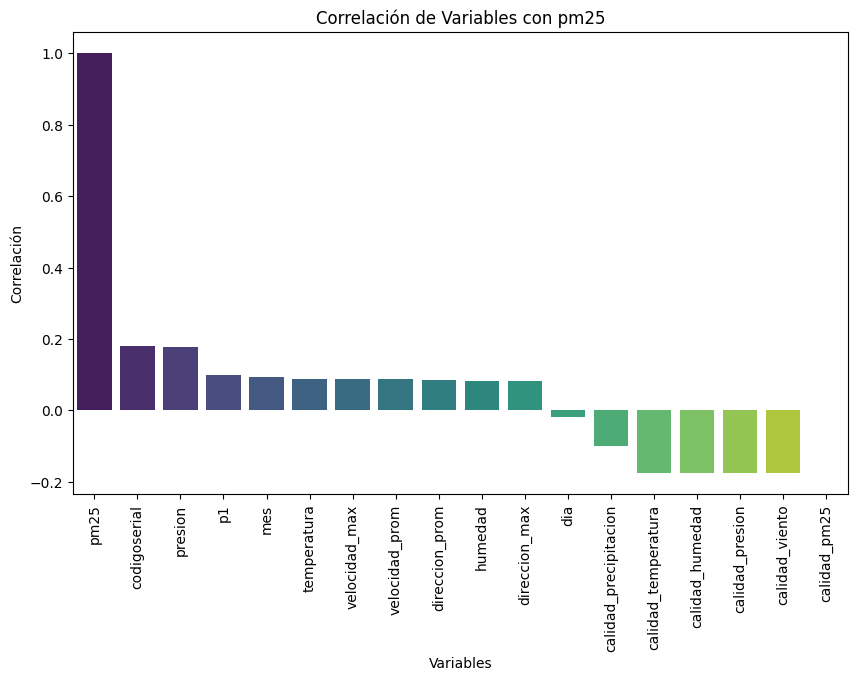

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la correlación de todas las variables con "pm25"
correlation = dataSetCalidadAire.corr()['pm25'].sort_values(ascending=False)

# Graficar las correlaciones
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation.index, y=correlation.values, palette='viridis')
plt.title('Correlación de Variables con pm25')
plt.xlabel('Variables')
plt.ylabel('Correlación')
plt.xticks(rotation=90)
plt.show()

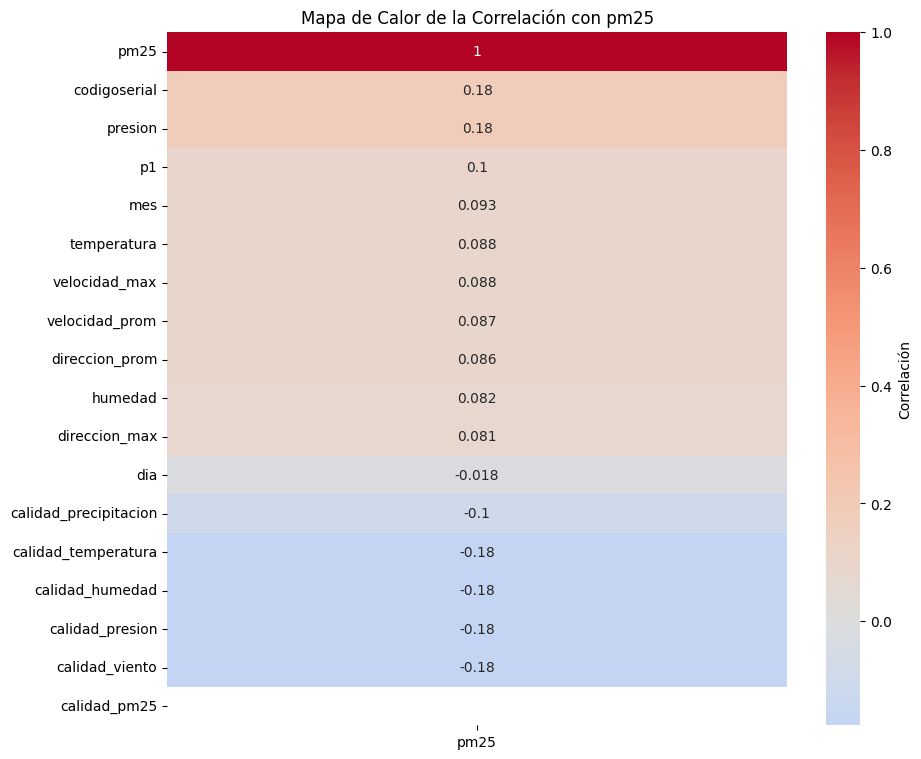

In [33]:
# Calcular la matriz de correlación
correlation_matrix = dataSetCalidadAire.corr()

# Filtrar para incluir solo la fila y columna de "pm25"
correlation_pm25 = correlation_matrix[['pm25']].sort_values(by='pm25', ascending=False)

# Crear el heatmap
plt.figure(figsize=(10, 9))
sns.heatmap(correlation_pm25, annot=True, cmap='coolwarm', center=0, cbar_kws={'label': 'Correlación'})
plt.title('Mapa de Calor de la Correlación con pm25')
plt.show()

Análisis exploratorio de los datos 

In [34]:
dataSetCalidadAire.describe()

mes         dia          pm25  calidad_pm25  codigoserial  \
count  180.000000  180.000000    180.000000         180.0    180.000000   
mean     2.516667   15.516667    398.910510           1.0     61.000000   
std      0.501116    8.708485   1867.328053           0.0     24.412654   
min      2.000000    1.000000  -1235.533741           1.0     28.000000   
25%      2.000000    8.000000     21.115891           1.0     28.000000   
50%      3.000000   15.500000     29.484673           1.0     69.000000   
75%      3.000000   23.000000     36.236144           1.0     86.000000   
max      3.000000   31.000000  16692.347842           1.0     86.000000   

       temperatura  calidad_temperatura     humedad  calidad_humedad  \
count   180.000000           180.000000  180.000000       180.000000   
mean    -37.432939            61.500000    5.708961        61.500000   
std     236.971624            75.176329  247.626450        75.176329   
min    -999.000000             1.000000 -999.000000         1.000000   
25%      21.149672             1.000000   60.754462         1.000000   
50%      22.569056             1.000000   67.109410         1.000000   
75%      24.010530           155.000000   74.028226       155.000000   
max      25.805556           155.000000   84.515444       155.000000   

          presion  calidad_presion          p1  calidad_precipitacion  \
count  180.000000       180.000000  180.000000             180.000000   
mean   451.746707        61.500000 -116.921109              19.333333   
std    528.430859        75.176329  317.054825              49.268390   
min   -999.000000         1.000000 -999.000000               1.000000   
25%      0.000000         1.000000    0.000000               1.000000   
50%    825.437187         1.000000    0.000000               1.000000   
75%    850.274757       155.000000    0.000144               1.000000   
max    853.860903       155.000000    0.064528             151.000000   

       velocidad_prom  calidad_viento  velocidad_max  direccion_prom  \
count      180.000000      180.000000     180.000000      180.000000   
mean       -57.119570       61.500000     -56.029210       70.374823   
std        232.099029       75.176329     232.371567      265.700656   
min       -999.000000        1.000000    -999.000000     -999.000000   
25%          1.508333        1.000000       2.365677      109.082986   
50%          1.790691        1.000000       2.841042      136.231597   
75%          2.082313      155.000000       3.424931      159.216667   
max          3.443611      155.000000       4.993056      218.192361   

       direccion_max  
count     180.000000  
mean       74.356258  
std       266.463443  
min      -999.000000  
25%       114.858854  
50%       143.168750  
75%       162.800000  
max       202.665278

In [35]:
tablaPivote = dataSetCalidadAire.pivot_table(index = 'codigoserial',
                               columns = 'mes',
                               aggfunc = {'pm25':'mean',
                                          'presion':'mean',
                                          'p1':'mean'})
tablaPivote

p1                    pm25                  presion  \
mes                  2           3           2            3           2   
codigoserial                                                              
28           -0.256778 -338.280332   27.594828    37.893817   -1.842026   
69           -0.256778 -338.280332  366.895838    70.739629  825.554124   
86           -0.022337   -1.834779  264.725515  1590.935023  851.759164   

                          
mes                    3  
codigoserial              
28             -0.044758  
69            207.692137  
86            848.021673

In [36]:
precipitacion_ita.p1.value_counts()

p1
 0.00      69524
-999.00    15127
 0.01        335
 0.02        156
 0.03        132
           ...  
 1.10          1
 1.63          1
 1.79          1
 1.80          1
 0.45          1
Name: count, Length: 137, dtype: int64

In [37]:
pd.concat([presion_aranj, presion_ita, presion_cal],axis=1)

fecha_hora  presion  calidad_presion           fecha_hora  \
0      2024-02-01 00:00:00    852.9                1  2024-02-01 00:00:00   
1      2024-02-01 00:01:00    852.8                1  2024-02-01 00:01:00   
2      2024-02-01 00:02:00    852.8                1  2024-02-01 00:02:00   
3      2024-02-01 00:03:00    852.8                1  2024-02-01 00:03:00   
4      2024-02-01 00:04:00    852.8                1  2024-02-01 00:04:00   
...                    ...      ...              ...                  ...   
86395  2024-03-31 23:55:00    854.2                1  2024-03-31 23:55:00   
86396  2024-03-31 23:56:00    854.2                1  2024-03-31 23:56:00   
86397  2024-03-31 23:57:00    854.2                1  2024-03-31 23:57:00   
86398  2024-03-31 23:58:00    854.2                1  2024-03-31 23:58:00   
86399  2024-03-31 23:59:00    854.2                1  2024-03-31 23:59:00   

       presion  calidad_presion           fecha_hora  presion  calidad_presion  
0          0.0              155  2024-02-01 00:00:00    827.1                1  
1          0.0              155  2024-02-01 00:01:00    827.1                1  
2          0.0              155  2024-02-01 00:02:00    827.1                1  
3          0.0              155  2024-02-01 00:03:00    827.0                1  
4          0.0              155  2024-02-01 00:04:00    827.0                1  
...        ...              ...                  ...      ...              ...  
86395      0.0              155  2024-03-31 23:55:00   -999.0              151  
86396      0.0              155  2024-03-31 23:56:00   -999.0              151  
86397      0.0              155  2024-03-31 23:57:00   -999.0              151  
86398      0.0              155  2024-03-31 23:58:00   -999.0              151  
86399      0.0              155  2024-03-31 23:59:00   -999.0              151  

[86400 rows x 9 columns]

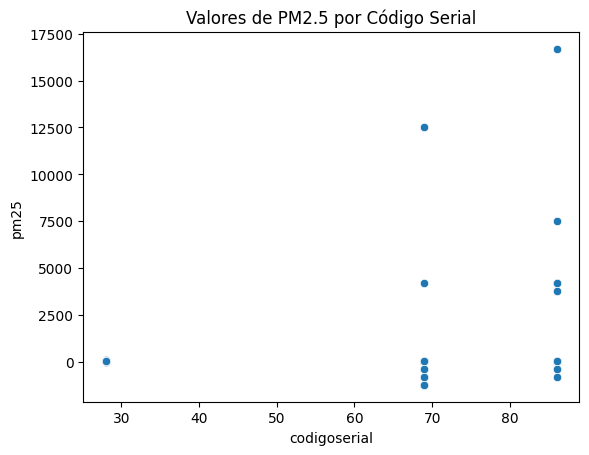

In [38]:
#Graficamos un histograma de nuestra tabla pivot

# sns.histplot(dataSetCalidadAire['pm25'], bins=5, kde=True)
# plt.title('Distribución de PM2.5')
# grafico por puntos 
sns.scatterplot(x=dataSetCalidadAire['codigoserial'], y=dataSetCalidadAire['pm25'])
plt.title('Valores de PM2.5 por Código Serial')
plt.show()

Text(0.5, 1.0, 'Valores de P1 por Codigo serial')

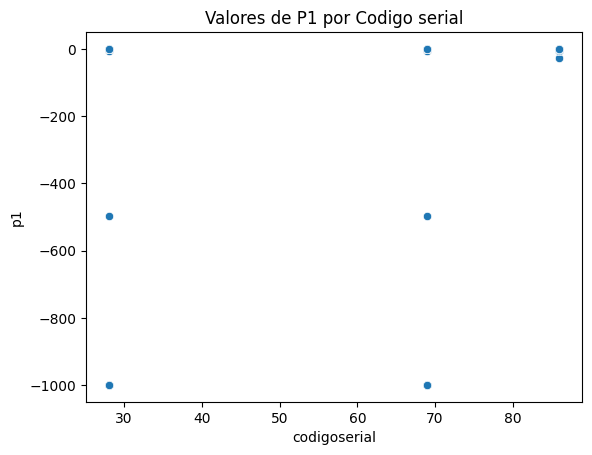

In [39]:
#Hacer barplot por p1

sns.scatterplot(x=dataSetCalidadAire['codigoserial'], y=dataSetCalidadAire['p1'])
plt.title('Valores de P1 por Codigo serial')


Pandas profile

In [40]:
from ydata_profiling import ProfileReport

In [44]:
#Generar y mostrar el reporte
reporte = ProfileReport(dataSetCalidadAire,
                        title="Reporte estadístico",
                        explorative=True,
                        autores={
                        "descripción": "Este es un analisis preeliminar para comprender de mejor forma los datos de nuestro dataset",
                        "autor 1": "Kenneth David Leonel Triana",
                        "autor 2": "Juan Jose Naranjo",
                        "autor 3": "Alejandro Mora",
                        "fecha": ' Agosto 2024',
                        "enlace": "<https://github.com/kennethLeonel/Monografia-calidad-del-aire-valle-de-aburra>",
                    })
reporte.to_notebook_iframe()
reporte.to_file("reporte.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Aspectos de mejora de la exploración de datos

Al detallar el comportamiento del dataset nos dimos cuenta que se debe mejorar las sigueintes cosas:

- Limpieza de datos: hay algunos datos con valores negativos que podrian referirse a datos faltantes pero que en el datset se reflejan con valores como -9999. esto es un aspecto a mejorar ya que al realizar nosotros el promedio de las columnas detallamos que el promedio nos va a dar negativo y eso no tiene sentido.

- Normalización de datos: Al explorar los dataset detallamos que es se puede normalizar las columnas temperatura, humedad, presion o pm25.

- Eliminación de datos: Las personas que continuen con la mejora de los resultados presentados pueden detallar si esos valores atipicos en ciertos registros se puedan considerar a eliminar.

- Transformación de datos: Al explorar los dataset detallamos que algunas columnas pueden tener una distribución diferente a la normal, lo que puede afectar a los resultados.

- Revisión de estaciones de monitoreo: Tener en cuenta los datos con sentido de las variables metereológicas en las diferentes estaciones, dado que puede existir la posibilidad que los sensores de alguna de ellas no arroje resultados coherentes o no estén en funcionamiento.

